In [1]:
# import via notebook
!mongoimport --type json -d air_b_and_b -c listings --drop --jsonArray listings_cleaned.json
!mongoimport --type json -d air_b_and_b -c reviews --drop --jsonArray review_cleaned.json

2024-03-18T21:24:07.147-0700	connected to: mongodb://localhost/
2024-03-18T21:24:07.148-0700	dropping: air_b_and_b.listings
2024-03-18T21:24:07.637-0700	7927 document(s) imported successfully. 0 document(s) failed to import.
2024-03-18T21:24:07.767-0700	connected to: mongodb://localhost/
2024-03-18T21:24:07.768-0700	dropping: air_b_and_b.reviews
2024-03-18T21:24:08.070-0700	6076 document(s) imported successfully. 0 document(s) failed to import.


In [2]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [4]:
# confirm that our new database was created
mongo.list_database_names()

['admin',
 'air_b_and_b',
 'classDB',
 'config',
 'epa',
 'gardenDB',
 'local',
 'met',
 'petsitly_marketing',
 'sfairbnb',
 'uk_food']

In [5]:
# assign the database to a variable name
db = mongo['air_b_and_b']
db.list_collection_names()

['listings', 'reviews']

In [6]:
# assign the collection to a variable
listings = db['listings']

In [7]:
cursor = db["listings"].find({})
json_data = list(cursor)

In [8]:
listings_df = pd.DataFrame(json_data)
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   _id                                           7927 non-null   object 
 1   id                                            7927 non-null   int64  
 2   listing_url                                   7927 non-null   object 
 3   name                                          7927 non-null   object 
 4   picture_url                                   7927 non-null   object 
 5   host_id                                       7927 non-null   int64  
 6   host_name                                     7927 non-null   object 
 7   host_since                                    7927 non-null   int64  
 8   host_is_superhost                             7927 non-null   bool   
 9   host_listings_count                           7927 non-null   f

In [9]:
# Listings per host
listings_per_host = ["host_id", "host_name", "host_listings_count", "calculated_host_listings_count", "host_total_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "room_type"]
listings_per_host_df = listings_df[listings_per_host]
listings_per_host_df

,host_id,host_name,host_listings_count,calculated_host_listings_count,host_total_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type
0,1682183,Daniel,2.0,1,2.0,1,0,0,Entire home/apt
1,1918239,Jen,1.0,1,1.0,1,0,0,Entire home/apt
2,648553,Julie & Brad,1.0,1,5.0,1,0,0,Entire home/apt
3,2318089,Inés,1.0,1,3.0,0,1,0,Private room
4,4106299,Henna,3.0,3,5.0,2,1,0,Private room
...,...,...,...,...,...,...,...,...,...
7922,242810,James,4.0,4,4.0,1,3,0,Private room
7923,161769990,William,1.0,1,3.0,1,0,0,Entire home/apt
7924,19361915,Shea,3.0,1,3.0,1,0,0,Entire home/apt
7925,549027756,Nazanina,1.0,1,1.0,1,0,0,Entire home/apt


In [10]:
# Sorting by host listings count
sorted_df = listings_per_host_df.sort_values(by='calculated_host_listings_count', ascending=False)
sorted_df

,host_id,host_name,host_listings_count,calculated_host_listings_count,host_total_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type
7587,542041520,Allen,265.0,249,281.0,0,248,1,Private room
7624,542041520,Allen,265.0,249,281.0,0,248,1,Private room
7618,542041520,Allen,265.0,249,281.0,0,248,1,Private room
7619,542041520,Allen,265.0,249,281.0,0,248,1,Private room
7620,542041520,Allen,265.0,249,281.0,0,248,1,Private room
...,...,...,...,...,...,...,...,...,...
4288,2489655,Christophe,1.0,1,4.0,1,0,0,Entire home/apt
4293,395804491,Andrea,1.0,1,1.0,1,0,0,Entire home/apt
4295,6340691,Mike,2.0,1,7.0,1,0,0,Entire home/apt
4298,229685084,Zhi Yuan,1.0,1,1.0,1,0,0,Entire home/apt


In [11]:
# Calculate number of 'Hotel Rooms' listed by each Host

df = pd.DataFrame(sorted_df)

# Pivot the DataFrame to count occurrences of 'Hotel room' for each 'host_id'
pivot_df = df.pivot_table(index='host_id', columns='room_type', aggfunc='size', fill_value=0)

# Extract the count of 'Hotel room' for each 'host_id'
hotel_room_counts = pivot_df['Hotel room'].reset_index(name='hotel_room_count')

hotel_room_counts

,host_id,hotel_room_count
0,1169,0
1,6267,0
2,7149,0
3,8904,0
4,10135,0
...,...,...
3930,547703977,0
3931,548149518,0
3932,548927680,0
3933,549017117,0


In [12]:
# Reorganize columns
new_table = ["host_id", "host_name", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "room_type", "calculated_host_listings_count"]
new_table_df = sorted_df[new_table]
new_table_df

,host_id,host_name,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,calculated_host_listings_count
7587,542041520,Allen,0,248,1,Private room,249
7624,542041520,Allen,0,248,1,Private room,249
7618,542041520,Allen,0,248,1,Private room,249
7619,542041520,Allen,0,248,1,Private room,249
7620,542041520,Allen,0,248,1,Private room,249
...,...,...,...,...,...,...,...
4288,2489655,Christophe,1,0,0,Entire home/apt,1
4293,395804491,Andrea,1,0,0,Entire home/apt,1
4295,6340691,Mike,1,0,0,Entire home/apt,1
4298,229685084,Zhi Yuan,1,0,0,Entire home/apt,1


In [13]:
# Merge the original DataFrame with the hotel_room_counts DataFrame
merged_df = pd.merge(new_table_df, hotel_room_counts, on='host_id', how='left')
merged_df

,host_id,host_name,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,calculated_host_listings_count,hotel_room_count
0,542041520,Allen,0,248,1,Private room,249,0
1,542041520,Allen,0,248,1,Private room,249,0
2,542041520,Allen,0,248,1,Private room,249,0
3,542041520,Allen,0,248,1,Private room,249,0
4,542041520,Allen,0,248,1,Private room,249,0
...,...,...,...,...,...,...,...,...
7922,2489655,Christophe,1,0,0,Entire home/apt,1,0
7923,395804491,Andrea,1,0,0,Entire home/apt,1,0
7924,6340691,Mike,1,0,0,Entire home/apt,1,0
7925,229685084,Zhi Yuan,1,0,0,Entire home/apt,1,0


In [14]:
# Remove duplicate host_id numbers to display each unique Host
unique_host_ids = merged_df.drop_duplicates(subset=['host_id'])
sorted_data = unique_host_ids.sort_values(by='calculated_host_listings_count', ascending=False)
sorted_data

,host_id,host_name,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,calculated_host_listings_count,hotel_room_count
0,542041520,Allen,0,248,1,Private room,249,0
249,107434423,Blueground,164,0,0,Entire home/apt,164,0
413,4430421,Landmark,154,1,0,Entire home/apt,155,0
566,520931919,Chris,0,148,0,Private room,148,0
714,173206762,Stratford,0,50,0,Private room,61,11
...,...,...,...,...,...,...,...,...
5989,222913107,Sophia,1,0,0,Entire home/apt,1,0
5990,223873896,George,1,0,0,Entire home/apt,1,0
5991,6484680,Thomas,1,0,0,Entire home/apt,1,0
5992,1253187,Diana,1,0,0,Entire home/apt,1,0


In [15]:
# Reorder Columns
df = pd.DataFrame(sorted_data)

# Get the list of column names
columns = sorted_data.columns.tolist()

# Reorder columns to make the second to last column the last column
new_columns = columns[:-2] + [columns[-1]] + [columns[-2]]

# Reorder DataFrame columns
df = df[new_columns]
df

,host_id,host_name,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,hotel_room_count,calculated_host_listings_count
0,542041520,Allen,0,248,1,Private room,0,249
249,107434423,Blueground,164,0,0,Entire home/apt,0,164
413,4430421,Landmark,154,1,0,Entire home/apt,0,155
566,520931919,Chris,0,148,0,Private room,0,148
714,173206762,Stratford,0,50,0,Private room,11,61
...,...,...,...,...,...,...,...,...
5989,222913107,Sophia,1,0,0,Entire home/apt,0,1
5990,223873896,George,1,0,0,Entire home/apt,0,1
5991,6484680,Thomas,1,0,0,Entire home/apt,0,1
5992,1253187,Diana,1,0,0,Entire home/apt,0,1


In [16]:
# Change column names
new = pd.DataFrame(df)

# New column names
new_column_names = ['Host ID', 'Host Name', '#Entire Home/Apt', '#Private Rooms','#Shared Rooms','Room Type','#Hotel Rooms', '#Listings']

new.columns = new_column_names

new

,Host ID,Host Name,#Entire Home/Apt,#Private Rooms,#Shared Rooms,Room Type,#Hotel Rooms,#Listings
0,542041520,Allen,0,248,1,Private room,0,249
249,107434423,Blueground,164,0,0,Entire home/apt,0,164
413,4430421,Landmark,154,1,0,Entire home/apt,0,155
566,520931919,Chris,0,148,0,Private room,0,148
714,173206762,Stratford,0,50,0,Private room,11,61
...,...,...,...,...,...,...,...,...
5989,222913107,Sophia,1,0,0,Entire home/apt,0,1
5990,223873896,George,1,0,0,Entire home/apt,0,1
5991,6484680,Thomas,1,0,0,Entire home/apt,0,1
5992,1253187,Diana,1,0,0,Entire home/apt,0,1


In [17]:
# Top Hosts
Top_Hosts = pd.DataFrame(new)
# Drop unnecessary columns 
dropped_columns = ['Host ID', 'Room Type']
Top_Hosts = Top_Hosts.drop(columns=dropped_columns)
Top_Hosts.head(50)

,Host Name,#Entire Home/Apt,#Private Rooms,#Shared Rooms,#Hotel Rooms,#Listings
0,Allen,0,248,1,0,249
249,Blueground,164,0,0,0,164
413,Landmark,154,1,0,0,155
566,Chris,0,148,0,0,148
714,Stratford,0,50,0,11,61
775,Rocky,1,54,0,0,55
817,Michael,53,0,0,0,53
870,Jim,48,0,0,0,48
871,Live Suite,48,0,0,0,48
873,Suiteness,0,48,0,0,48


In [18]:
Top_Hosts.head(10)

,Host Name,#Entire Home/Apt,#Private Rooms,#Shared Rooms,#Hotel Rooms,#Listings
0,Allen,0,248,1,0,249
249,Blueground,164,0,0,0,164
413,Landmark,154,1,0,0,155
566,Chris,0,148,0,0,148
714,Stratford,0,50,0,11,61
775,Rocky,1,54,0,0,55
817,Michael,53,0,0,0,53
870,Jim,48,0,0,0,48
871,Live Suite,48,0,0,0,48
873,Suiteness,0,48,0,0,48


/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_28426/1876599096.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_listings_per_range = df.groupby('listings_per_host_bins')['#Listings'].sum()
/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_28426/1876599096.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_listings_per_range.index.astype(str), y=total_listings_per_range.values, palette='viridis')


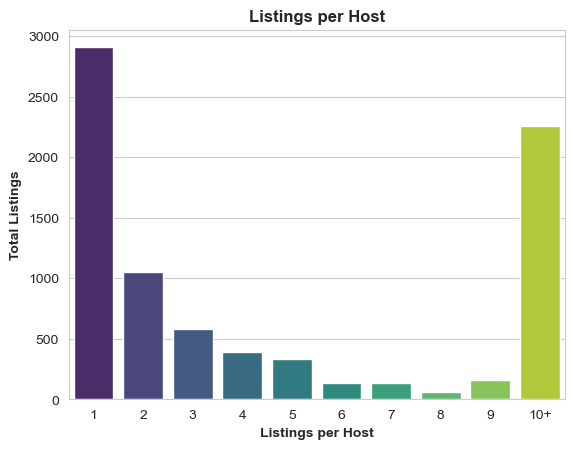

In [19]:
# Listings per Host Bar Chart 

df = pd.DataFrame(Top_Hosts)

# Create bins for listings per host
bins = list(range(1, 11)) + [float('inf')]  # 10+ listings per host

# Bin the data
df['listings_per_host_bins'] = pd.cut(df['#Listings'], bins=bins, right=False)

# Calculate total listings for each range of listings per host
total_listings_per_range = df.groupby('listings_per_host_bins')['#Listings'].sum()

# Use Seaborn style
sns.set_style('whitegrid')

# Plot the bar chart using Seaborn
sns.barplot(x=total_listings_per_range.index.astype(str), y=total_listings_per_range.values, palette='viridis')

# Add labels and title
plt.xlabel('Listings per Host', fontweight='bold')
plt.ylabel('Total Listings', fontweight='bold')
plt.title('Listings per Host', fontweight='bold')

# Change the names of the ticks on the x-axis
new_xticks = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
plt.xticks(range(len(new_xticks)), new_xticks)

# Save the image as a PNG file
plt.savefig('Listings_per_Host_bar.png')

# Show plot
plt.show()

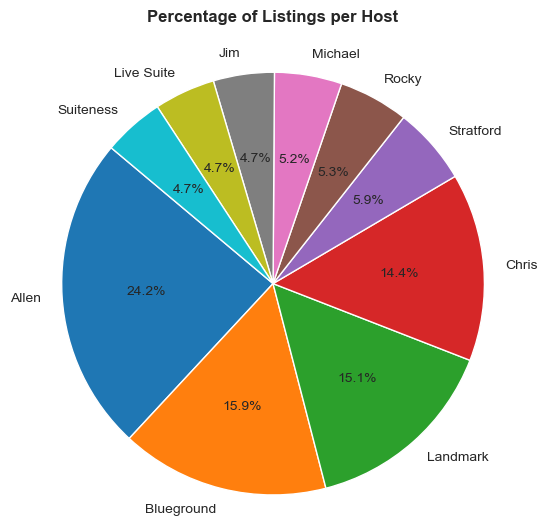

In [20]:
# Percentage of Listings per Host from the Top 10 Hosts Pie Chart

df = pd.DataFrame(Top_Hosts.head(10))

# Calculate total listings
total_listings = df['#Listings'].sum()

# Calculate percentage of listings per host out of total listings
df['percentage_of_total_listings'] = (df['#Listings'] / total_listings) * 100

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(df['percentage_of_total_listings'], labels=df['Host Name'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Listings per Host', y=1.05, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Save the image as a PNG file
plt.savefig('Listings_by_Host.png')

plt.show()

In [21]:
#check types of entries for room_type
listings_df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [22]:
# getting the total number of accommodations
total_count = listings_df['room_type'].count()
total_count

7927

In [23]:
# Calculate the total occurrences of each room type
room_type_count = listings_df['room_type'].value_counts()
room_type_count

room_type
Entire home/apt    4939
Private room       2862
Shared room          68
Hotel room           58
Name: count, dtype: int64

In [24]:
room_type_percentages = (room_type_count / room_type_count.sum() * 100).apply(lambda x: '{:.0f}%'.format(x))
pprint(room_type_percentages)

room_type
Entire home/apt    62%
Private room       36%
Shared room         1%
Hotel room          1%
Name: count, dtype: object


In [25]:
# Create a DataFrame 
room_type_table_df = pd.DataFrame({'Total': room_type_count,
                                   'Percent': room_type_percentages, 
                                   })

# Drop the heading for 'Room Type'
room_type_table_df.index.name = None

room_type_table_df 

,Total,Percent
Entire home/apt,4939,62%
Private room,2862,36%
Shared room,68,1%
Hotel room,58,1%


/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_28426/3939911689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Room Type', data=df, palette='rocket')


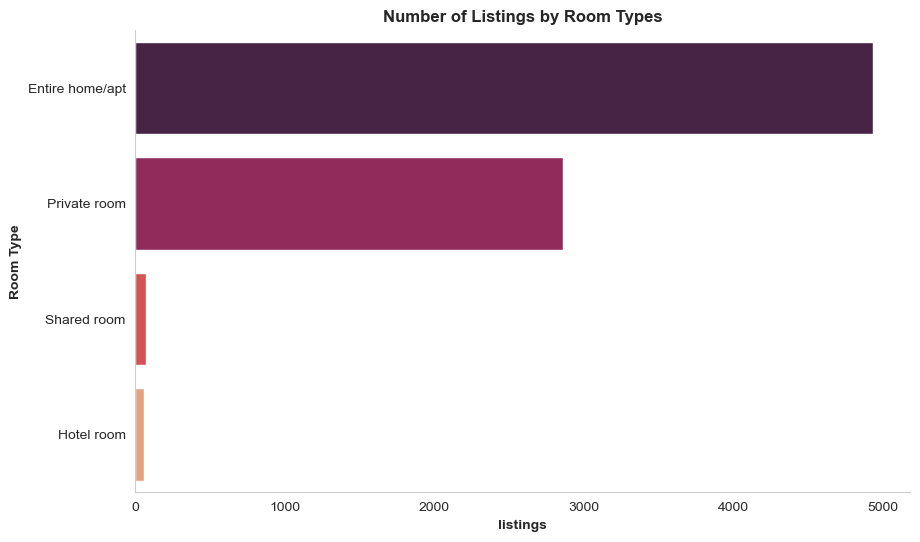

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the value counts
data = {'Room Type': ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
        'Count': [4939, 2862, 68, 58]}
df = pd.DataFrame(data)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Room Type', data=df, palette='rocket')

# Remove the top and right spines
sns.despine()

# Remove vertical and horizontal gridlines
plt.grid(False)

plt.title('Number of Listings by Room Types', fontweight='bold')
plt.xlabel('listings', fontweight='bold')
plt.ylabel('Room Type', fontweight='bold')

# Save the image as a PNG file
plt.savefig('Room_Types.png')

# Show the plot
plt.show()

In [27]:
# getting the total number of licenses
#change the name of the main dataframe to the one that includes the license_status
total_license_count = listings_df['license_status'].count()
total_license_count

7927

In [28]:
# Calculate the total occurrences of each license type
license_type_count = listings_df['license_status'].value_counts()
license_type_count

license_status
Licensed      6407
Exempt        1098
Unlicensed     268
Pending        154
Name: count, dtype: int64

In [29]:
license_type_percentages = (license_type_count / license_type_count.sum() * 100).apply(lambda x: '{:.0f}%'.format(x))
license_type_percentages

license_status
Licensed      81%
Exempt        14%
Unlicensed     3%
Pending        2%
Name: count, dtype: object

In [30]:
# Create a DataFrame 
license_type_table_df = pd.DataFrame({'Total': license_type_count,
                                   'Percent': license_type_percentages, 
                                   })

# Drop the heading for 'Room Type'
license_type_table_df.index.name = None

license_type_table_df

,Total,Percent
Licensed,6407,81%
Exempt,1098,14%
Unlicensed,268,3%
Pending,154,2%


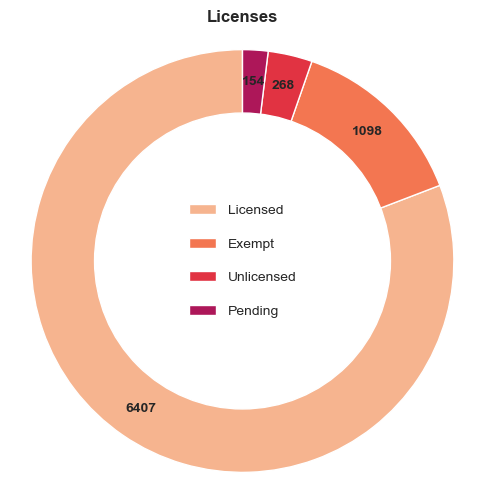

In [31]:
# Plotting the donut chart for license
# Create a DataFrame with the value counts
import numpy as np

data = {'License': ['Licensed', 'Exempt', 'Unlicensed', 'Pending'],
        'Count': [6407, 1098, 268, 154]}
df = pd.DataFrame(data)

# Create a donut plot chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(df['Count'], startangle=90, colors=sns.color_palette('rocket_r'), autopct="")
plt.title('Licenses',fontweight='bold')  # Make bold)

# Add counts inside the plot
for i, count in enumerate(df['Count']):
    angle = (patches[i].theta2 + patches[i].theta1) / 2
    x = patches[i].center[0] + 0.5 * patches[i].r * 1.7 * np.cos(angle * np.pi / 180)
    y = patches[i].center[1] + 0.5 * patches[i].r * 1.7 * np.sin(angle * np.pi / 180)
    plt.text(x, y, f'{count}', ha='center', va='center', fontsize=10, fontweight='bold')

# Add a white circle in the center to create a hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
    
# Set legend inside the plot
plt.legend(loc='center', fontsize=10, labels=df['License'], labelspacing=1.5, frameon=False)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the image as a PNG file
plt.savefig('license.png')

plt.show()